## 3.2.1 유튜브 랭킹 데이터 수집하기

In [92]:
# 예제 3-38 라이브러리 추가하기
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd
import numpy as np

top300<br>
구독자순?<br>
동영상수 순?<br>
재생수 순?<br>
골드버튼, 다이아버튼이 차지하는 비율 + 골드버튼, 다이아버튼의 조회수 비율 => good!!!<br>
<br>
동영상 수?<br>
재생수 = 총 재생길이 top300<br>
조회수 = 영상을 재생한지 30초 이상일때 카운트<br>

구독자수와 조회수를 비교하여 충성도?유입도? 비교<br>

In [133]:
# 예제 3-39 webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('c:/driver/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

In [15]:
# 예제 3-39 webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('c:/driver/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&sca=BJ%2F%EC%9D%B8%EB%AC%BC%2F%EC%97%B0%EC%98%88%EC%9D%B8" 
browser.get(url)

In [78]:
# 예제 3-40 페이지 정보 가져오기
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')
print(soup)

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="https://youtube-rank.com/css/default.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/bootstrap.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/nifty.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/themes/type-c/theme-well-red.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?191202" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch

In [79]:
# 예제 3-41 BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [80]:
# 예제 3-42 tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [81]:
# 예제3-43채널태그출력및태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [82]:
# 예제 3-44 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [83]:
# 예제 3-45 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [84]:
# 예제 3-46 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

6270만
183억9786만
360개


In [85]:
# 예제 3-47 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr') 
# channel_list = soup.select('tbody > tr.aos-init aos-animate')
print(channel_list, '\n')
print(len(channel_list))

[<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class=

In [86]:
test = []
for channel in channel_list:
    if channel.select('h1 > a')[0] != '\n':
        title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)
        test.append(title)
    print(test)
print(len(test))

IndentationError: unexpected indent (<ipython-input-86-c8f0ca28bb3a>, line 10)

In [87]:
# 예제 3-48 페이지별 URL 만들기
# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [88]:
# 예제 3-49 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

In [89]:
# 예제 3-50 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

In [112]:
browser = webdriver.Chrome('c:/driver/chromedriver.exe')
url = "https://youtube-rank.com/board/?mid=home"
results = []

browser.get(url)
time.sleep(2)
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

channel_list = soup.select('div.info')
for channel in channel_list:
    title = channel.select('h3 > a')[0].text.strip()
    category = channel.select('p.cate')[0].text.strip()
    subscriber = channel.select('span.subscriber_cnt')[0].text
    view = channel.select('span.view_cnt')[0].text
    video = channel.select('span.video_cnt')[0].text
    data = [title, category, subscriber, view, video]
    results.append(data)

    # print(results)

browser.quit()

df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df = df.iloc[0:300, :]
df
# df.to_excel('./files/youtube_300rank_sub.xlsx', index=False)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,62700000,18397868786,360
1,HYBE LABELS,음악/댄스/가수,58100000,17700851275,630
2,BANGTANTV,음악/댄스/가수,53100000,11076726233,1525
3,SMTOWN,음악/댄스/가수,28200000,21463391357,3714
4,Boram Tube Vlog [보람튜브 브이로그],키즈/어린이,26500000,11052881375,223
...,...,...,...,...,...
295,김종국 GYM JONG KOOK,미분류,1410000,17471957,3
296,T1 Faker,게임,1410000,252669899,1183
297,Lemoring,음악/댄스/가수,1410000,736511147,483
298,MBCNEWS,뉴스/정치/사회,1410000,3092669757,111727


In [155]:
df = df.sort_values(by='video', axis=0, ascending=False)
df_top10 = df.iloc[0:10, :]
# df_top10.colums['index']
df_top10


,title,category,subscriber,view,video
71,KBS Entertain,TV/방송,4420000,6884781929,99075
250,HONG SOUND,음식/요리/레시피,1620000,368001403,987
280,ETTV 이티티비,음식/요리/레시피,1480000,623047387,987
20,서은이야기[SeoeunStory],키즈/어린이,9310000,3954116232,981
128,유디티TV,음식/요리/레시피,2910000,584995150,978
215,tvN D STUDIO,TV/방송,1860000,519969886,964
289,Daily Busking,음악/댄스/가수,1440000,571640493,961
98,JaeYeol ASMR 재열,취미/라이프,3710000,964206003,949
264,OfficialLEEHI,음악/댄스/가수,1560000,323448272,94
292,KBS Drama Classic,뉴스/정치/사회,1420000,1293421438,9345


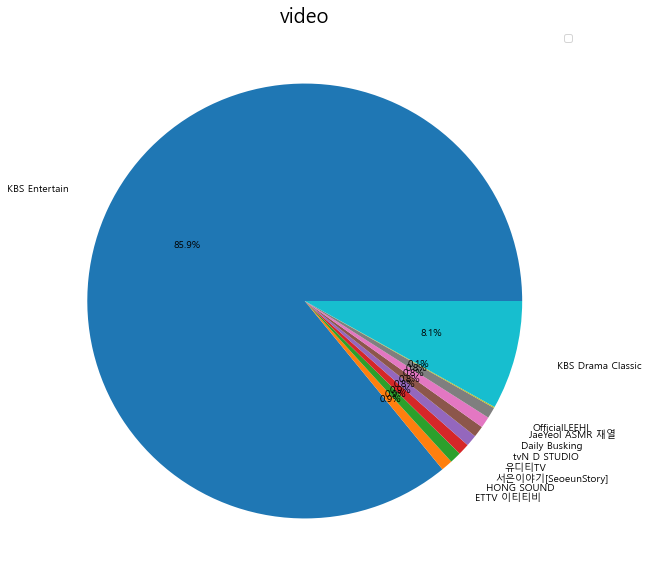

In [154]:
df_top10_title = ['KBS Entertain', 'HONG SOUND', 'ETTV 이티티비', '서은이야기[SeoeunStory]', '유디티TV', 'tvN D STUDIO', 'Daily Busking', 'JaeYeol ASMR 재열', 'OfficialLEEHI', 'KBS Drama Classic', '대도서관TV (buzzbean11)']

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (30,10))
plt.title('video', size=20)
plt.legend(df_top10_title, loc="best")
plt.pie(df_top10['video'], labels=df_top10['title'], labeldistance=1.2, autopct='%1.1f%%');
# plt.savefig('./img/save1.png')

In [103]:
df.iloc[299]

title         철구형 (CHULTUBE)
category           BJ/인물/연예인
subscriber           1410000
view              1265045424
video                   6877
Name: 299, dtype: object

## 3.2.2 유튜브 랭킹 데이터 시각화하기

In [93]:
# 예제 3-51 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# 예제 3-52 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [96]:
# 예제 3-53 엑셀 파일 불러오기
df = pd.read_excel('./files/youtube_rank_BJ.xlsx')
df.head()

,title,category,subscriber,view,video
0,[Awesome Haeun]어썸하은,[BJ/인물/연예인],513만,7억8658만,478개
1,영국남자 Korean Englishman,[BJ/인물/연예인],392만,12억8703만,426개
2,허팝Heopop,[BJ/인물/연예인],377만,30억6670만,"1,804개"
3,워크맨-Workman,[BJ/인물/연예인],374만,6억4541만,135개
4,waveya 2011,[BJ/인물/연예인],373만,13억4111만,695개


In [97]:
# 예제 3-54 데이터 살펴보기
df.tail()

,title,category,subscriber,view,video
241,여제TV,[BJ/인물/연예인],비공개,2311만,"1,666개"
242,조섭 Jossup,[BJ/인물/연예인],비공개,3억7766만,"1,083개"
243,임다TV,[BJ/인물/연예인],비공개,3억1019만,636개
244,보겸TV,[BJ/인물/연예인],비공개,26억1209만,"8,909개"
245,양팡 YangPang,[BJ/인물/연예인],비공개,14억4740만,"2,478개"


In [88]:
# 예제 3-55 데이터 살펴보기
df['subscriber'][0:10]

0    6270만
1    5800만
2    5310만
3    2810만
4    2650만
5    2410만
6    2300만
7    2120만
8    1910만
9    1820만
Name: subscriber, dtype: object

In [89]:
# 예제 3-56 데이터 살펴보기
df['subscriber'].str.replace('만', '0000')[0:10]

0    62700000
1    58000000
2    53100000
3    28100000
4    26500000
5    24100000
6    23000000
7    21200000
8    19100000
9    18200000
Name: subscriber, dtype: object

In [90]:
# 예제 3-57 replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6270만,183억6911만,360개,62700000
1,HYBE LABELS,[음악/댄스/가수],5800만,176억8026만,629개,58000000
2,BANGTANTV,[음악/댄스/가수],5310만,110억7672만,"1,524개",53100000
3,SMTOWN,[음악/댄스/가수],2810만,214억5036만,"3,713개",28100000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [91]:
# 예제 3-58 데이터 상세 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [92]:
# 예제 3-59 Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [70]:
# 예제 3-60 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],5130000392000037700003740000373000035200002350...,246


In [58]:
# 예제 3-61 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],98370000,73
[IT/기술/컴퓨터],7760000,8
[TV/방송],226360000,147
[게임],70060000,81
[교육/강의],22430000,21


In [59]:
# 예제3-62 데이터프레임의인덱스초기화하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],98370000,73
1,[IT/기술/컴퓨터],7760000,8
2,[TV/방송],226360000,147
3,[게임],70060000,81
4,[교육/강의],22430000,21


In [60]:
# 예제3-63 데이터프레임을내림차순정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],660090000,172
17,[키즈/어린이],259740000,90
2,[TV/방송],226360000,147
11,[음식/요리/레시피],175870000,86
7,[미분류],101600000,100


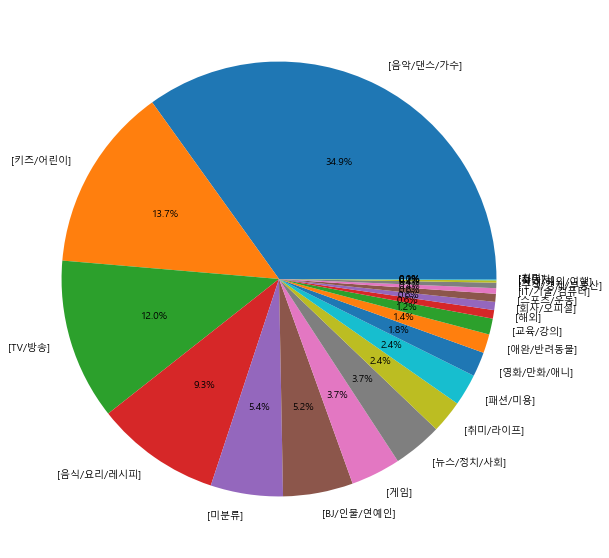

In [61]:
# 예제3-64 카테고리별구독자수시각화하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

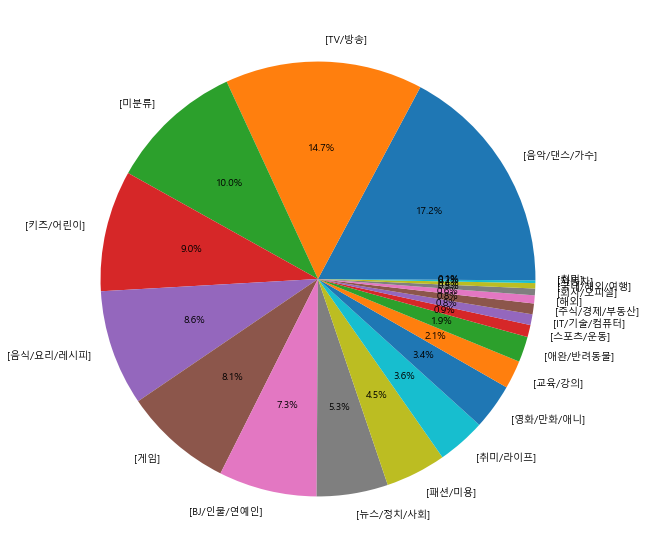

In [62]:
# 예제 3-65 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()